In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 反向传播 backpropagation
# 需要先设置为可训练参数
w = tf.Variable(tf.constant(5, dtype=tf.float32))
lr = 0.2
epochs = 40

for epoch in range(epochs+1):
    with tf.GradientTape() as tape:
        loss = tf.square(w+1)
    grads = tape.gradient(loss, w)

    w.assign_sub(lr * grads)
    if epoch % 10 == 0:
        print("After %s epoch, w is %f, loss if %f" % (epoch, w.numpy(), loss)) 

After 0 epoch, w is 2.600000, loss if 36.000000
After 10 epoch, w is -0.978232, loss if 0.001316
After 20 epoch, w is -0.999868, loss if 0.000000
After 30 epoch, w is -0.999999, loss if 0.000000
After 40 epoch, w is -1.000000, loss if 0.000000


### 张量(tensor)：多维数组(列表)，阶(张量的维度)

- 0-D   0阶 标量scalar  s=1 2 3
- 1-D   1阶 向量vector  v=[1,2,3]
- 2-D   2阶 矩阵matrix  m=[[1,2,3],[4,5,6],[7,8,9]]
- n-D   n阶 张量tensor  t=[[[... n个中括号

### 数据类型

- `tf.int`, `tf.float`...
  - tf.int32, tf.float32, tf.float64
- `tf.bool`
  - tf.const([True, True])
- `tf.string`
  - tf.constant("Hello, world!")

### 如何创建一个 `Tensor`

- 创建一个张量 `tf.constant(张量内容, dtype=数据类型(可选))`

In [4]:
a = tf.constant([1, 5], dtype=tf.int64)
print(a)
print(a.dtype)
print(a.shape)

tf.Tensor([1 5], shape=(2,), dtype=int64)
<dtype: 'int64'>
(2,)


- 将 `numpy` 的数据类型转换为 `Tensor` 数据类型 `tf.convert_to_tensor(数据名, dtype=数据类型(可选))`

In [5]:
a = np.arange(0, 5)
b = tf.convert_to_tensor(a, dtype=tf.int64)
print(a)
print(b)

[0 1 2 3 4]
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


- 创建全为0的张量
  - `tf.zeros(维度)`
- 创建全为1的张量
  - `tf.ones(维度)`
- 创建全为指定值的张量
  - `tf.fill(维度, 指定值)`
- 维度：
  - 一维 直接写个数
  - 二维 用[行 列]
  - 多维 用[n,m,j,k......]

In [6]:
a = tf.zeros(((2, 3)))
b = tf.ones(4)
c = tf.fill((2, 2), 9)
print(a)
print(b)
print(c)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)
tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


- 生成正态分布的随机数，默认均值为0，标准差为1
  - `tf.random.normal(维度, mean=均值, stddev=标准差)`
- 生成截断式正太分布的随机数
  - `tf.random.truncated_normal(维度, mean=均值, stddev=标准差)`
  - 生成的数据取值在 (μ-2δ, μ+2δ)
- 生成均匀分布随机数 [minval, maxval)
  - `tf.random.uniform(维度, minval=最小值, maxval=最大值)`

In [7]:
d = tf.random.normal((2, 2), mean=0.5, stddev=1)
print(d)
print("mean(d):", tf.reduce_mean(d))

e = tf.random.truncated_normal((2, 2), mean=0.5, stddev=1)
print(e)
print("mean(e):", tf.reduce_mean(e))

f = tf.random.uniform((2, 2), minval=0, maxval=1)
print(f)
print("mean(f):", tf.reduce_mean(f))

tf.Tensor(
[[-1.2783725  -0.08786917]
 [-0.31609505 -0.93436253]], shape=(2, 2), dtype=float32)
mean(d): tf.Tensor(-0.6541748, shape=(), dtype=float32)
tf.Tensor(
[[ 0.5581544   0.738902  ]
 [ 1.6510836  -0.42922652]], shape=(2, 2), dtype=float32)
mean(e): tf.Tensor(0.62972844, shape=(), dtype=float32)
tf.Tensor(
[[0.4863268  0.90099823]
 [0.13717973 0.51025224]], shape=(2, 2), dtype=float32)
mean(f): tf.Tensor(0.5086893, shape=(), dtype=float32)


- `tf.cast` 强制 tensor 转换为该数据类型
- `tf.reduce_min` 计算张量维度上元素的最小值
- `tf.reduce_max` 计算张量维度上元素的最大值

In [8]:
x1 = tf.constant([1., 2., 3.], dtype=tf.float64)
print(x1)
x2 = tf.cast(x1, tf.int32)
print(x2)
print(tf.reduce_min(x2), tf.reduce_max(x2))

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)


### 常用函数

#### 理解axis

在一个二维张量或数组中，可以通过调整 axis 等于 0或1 控制执行维度。
- `axis=0` 代表跨行(经度，down)，而 `axis=1` 代表跨列(纬度，across)
- 如果不指定 axis，则所有元素参与计算
- 指定哪个维度，哪个维度被压缩

![维度的定义](img/img1.png)

- `tf.reduce_mean(张量名, axis=操作轴)` 计算张量沿着指定维度的平均值
- `tf.reduce_sum(张量名, axis=操作轴)` 计算张量沿着指定维度的和

In [9]:
x = tf.constant([[1, 2, 3], 
                [2, 2, 3]])
print(x)
print(tf.reduce_mean(x, axis=0))
print(tf.reduce_sum(x, axis=1))

tf.Tensor(
[[1 2 3]
 [2 2 3]], shape=(2, 3), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([6 7], shape=(2,), dtype=int32)


- `tf.Variable()` 将变量**标记为“可训练”**，被标记的变量会在反向传播中记录梯度信息。神经网络训练中，常用该函数标记待训练参数。


### Tensorflow中的数学运算

- 对应元素的四则运算(只有维度相同的张量才可以进行四则运算)：`tf.add`, `tf.subtract`, `tf.multiply`, `tf.divide`
- 开方、次方与平方：`tf.square`, `tf.pow`, `tf.sqrt`
- 矩阵乘：`tf.matmul`

In [10]:
a = tf.ones([1, 3])
b = tf.fill([1, 3], 3.)
print(a)
print(b)
print(tf.add(a, b))
print(tf.subtract(a, b))
print(tf.multiply(a, b))
print(tf.divide(b, a))
print()

# 平方、n次方、开方
print(tf.pow(b, 3))
print(tf.square(b))
print(tf.sqrt(b))
print()

# 事项两个矩阵的相乘
a = tf.ones([3, 2])
b = tf.fill([2, 3], 3.)
print(tf.matmul(a, b))


tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32)
tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
tf.Tensor([[-2. -2. -2.]], shape=(1, 3), dtype=float32)
tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)

tf.Tensor([[27. 27. 27.]], shape=(1, 3), dtype=float32)
tf.Tensor([[9. 9. 9.]], shape=(1, 3), dtype=float32)
tf.Tensor([[1.7320508 1.7320508 1.7320508]], shape=(1, 3), dtype=float32)

tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]], shape=(3, 3), dtype=float32)


### 常用函数 `tf.data.Dataset.from_tensor_slices`

- 切分传入张量的第一维度，生成输入特征/标签对，构建数据集
- `data = tf.data.Dataset.from_tensor_slices((输入特征, 标签))`
- `Numpy` 和 `Tensor` 格式都可用于该语句读入数据

In [11]:
features = tf.constant([12,23,10,17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
print(dataset)
for element in dataset:
    print(element)

<TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)>
(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


### 常用函数 `tf.GradientTape`

- `with` 结构记录计算过程，`gradient` 求出张量的梯度

```python
with tf.GradientTape() as tape:
    # 若干计算过程
grad = tape.gradient(函数, 对谁求导)
```

In [12]:
with tf.GradientTape() as tape:
    w = tf.Variable(tf.constant(3.0))
    loss = tf.pow(w, 2)
grad = tape.gradient(loss, w)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


### 常用函数 `enumerate`

- `enumerate` 是 `Python` 的内建函数，它可遍历每个元素(如列表、元组或字符串)，**组合为：索引、元素**，常在 `for` 循环中使用。
- `enumerate()`

In [13]:
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
    print(i, element)

0 one
1 two
2 three


### 常用函数 `tf.one_hot`

- 独热编码(one-hot encoding)：在分类问题中，常用独热编码做标签，标记类别：1表示是，0表示非。
- `tf.one_hot()` 函数将待转换数据，转换为 `one-hot` 形式的数据输出。
- `tf.one_hot(待转换数据, depth=几分类)`

In [14]:
classes = 3
labels = tf.constant([1,0,2])   # 输入的元素值最小为0，最大为2
output = tf.one_hot(labels, depth=classes)
print(output)

tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


### 常用函数 `tf.nn.softmax`

- 使输出符合概率分布，进而与独热码形式的标签作比较
- 当n分类的n个输出(y0,y1,...,yn-1)通过 `softmax()` 函数，便符合概率分布

In [15]:
y = tf.constant([1.01, 2.01, -0.66])
y_pro = tf.nn.softmax(y)
print("After softmax, y_pro is:", y_pro)

After softmax, y_pro is: tf.Tensor([0.25598174 0.69583046 0.04818781], shape=(3,), dtype=float32)


### 常用函数 `assign_sub`

- 赋值操作，更新参数的值并返回
- 调用 `assign_sub` 前，先用 `tf.Variable` 定义变量 w 为可训练(可自更新)。
- `w.assign_sub(w要自减的内容)`

In [16]:
w = tf.Variable(4)
w.assign_sub(1)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


### 常用函数 `tf.argmax`

- 返回张量沿指定维度最大值的索引
- `tf.argmax(张量名, axis=操作轴)`

In [17]:
test = np.array([[1, 2, 3], [2, 3, 4], [5, 4, 3], [8, 7, 2]])
print(test)
print(tf.argmax(test, axis=0))
print(tf.argmax(test, axis=1))

[[1 2 3]
 [2 3 4]
 [5 4 3]
 [8 7 2]]
tf.Tensor([3 3 1], shape=(3,), dtype=int64)
tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


### 鸢尾花数据集(Iris)

- 数据集介绍

共有数据150组，每组包括花萼长、花萼宽、花瓣长、花瓣宽4个输入特征。同时给出了，这一组特征对应的鸢尾花类别。类别包括狗尾鸢尾、杂色鸢尾，弗吉尼亚鸢尾三类，分类用数字0，1，2表示。

- 从 `sklearn` 包 `datasets` 读入数据集，语法为：

```python
from sklearn.datasets import load_iris
x_data = load_iris().data   # 返回iris数据集所有输入特征
y_data = load_iris().target # 返回iris数据集所有标签
```

In [18]:
from sklearn.datasets import load_iris
import pandas as pd

x_data = load_iris().data
y_data = load_iris().target
print("x_data from datasets:\n", x_data)
print("y_data from datasets:\n", y_data)

x_data = pd.DataFrame(x_data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'])
pd.set_option("display.unicode.east_asian_width", True)

x_data['类别'] = y_data     # 新增一列，列标签为“类别”，数据为y_data
print("X_data add a column:\n", x_data)

x_data from datasets:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.

### 神经网络实现鸢尾花分类

- 准备数据
  - 数据集读入
  - 数据集乱序
  - 生成训练集和测试集(即 x_train/y_train, x_test/y_test)
  - 配成(输入特征, 标签)对，每次读入一小撮(batch)
- 搭建网络
  - 定义神经网络中所有可训练参数
- 参数优化
  - 嵌套循环迭代，`with` 结构更新参数，显示当前 `loss`
- 测试效果
  - 计算当前参数前向传播后的准确率，显示当前 `acc`
- `acc/loss` 可视化

Epoch 0. loss: 0.18948042020201683
Test_acc 0.7
-----------------------
Epoch 1. loss: 0.17079350352287292
Test_acc 0.7
-----------------------
Epoch 2. loss: 0.16424234583973885
Test_acc 0.7
-----------------------
Epoch 3. loss: 0.15846453234553337
Test_acc 0.7
-----------------------
Epoch 4. loss: 0.1534098945558071
Test_acc 0.7
-----------------------
Epoch 5. loss: 0.14898332580924034
Test_acc 0.7
-----------------------
Epoch 6. loss: 0.145090252161026
Test_acc 0.7
-----------------------
Epoch 7. loss: 0.14164571277797222
Test_acc 0.7
-----------------------
Epoch 8. loss: 0.13857670687139034
Test_acc 0.7
-----------------------
Epoch 9. loss: 0.13582199066877365
Test_acc 0.7
-----------------------
Epoch 10. loss: 0.13333084248006344
Test_acc 0.7
-----------------------
Epoch 11. loss: 0.13106147572398186
Test_acc 0.7
-----------------------
Epoch 12. loss: 0.1289796158671379
Test_acc 0.7
-----------------------
Epoch 13. loss: 0.12705708667635918
Test_acc 0.7
----------------

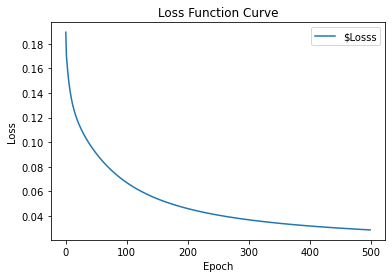

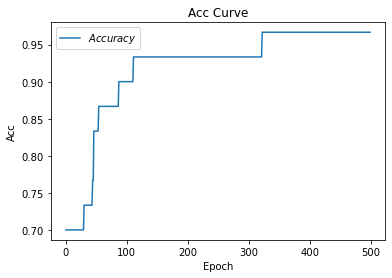

In [19]:
# 导入包
import numpy as mp
import tensorflow as tf
from sklearn.datasets import load_iris

# 划分数据集
x_data = load_iris().data
y_data = load_iris().target
# 随机分组
np.random.seed(111)
np.random.shuffle(x_data)
np.random.seed(111)
np.random.shuffle(y_data)

x_train, y_train = x_data[:-30], y_data[:-30]
x_test, y_test = x_data[-30:], y_data[-30:]
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 搭建网络
w = tf.Variable(tf.random.truncated_normal((4, 3), stddev=0.1, seed=1))
b = tf.Variable(tf.random.truncated_normal((3,), stddev=0.1,seed=1))

# 设置超参数
lr = 0.1
train_loss_results = []
test_acc = []
epochs = 500
loss_all = 0

# 训练模型
for epoch in range(epochs):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train, w) + b
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        grads = tape.gradient(loss, [w, b])

        w.assign_sub(lr * grads[0])
        b.assign_sub(lr * grads[1])

    print("Epoch {}. loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)
    loss_all = 0

    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        y = tf.matmul(x_test, w) + b
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc", acc)
    print("-----------------------")

# 绘图
plt.title("Loss Function Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_loss_results, label="$Losss")
plt.legend()
plt.show()

# 绘制 Accuracy 曲线
plt.title("Acc Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.plot(test_acc, label="$Accuracy$")
plt.legend()
plt.show()

Epoch 0, loss 0.22117557376623154
Test_acc:  0.23333333333333334
------------------------
Epoch 100, loss 0.06599666550755501
Test_acc:  0.9666666666666667
------------------------
Epoch 200, loss 0.045768097043037415
Test_acc:  0.9666666666666667
------------------------
Epoch 300, loss 0.03667847579345107
Test_acc:  0.9666666666666667
------------------------
Epoch 400, loss 0.03158428240567446
Test_acc:  0.9666666666666667
------------------------
Epoch 500, loss 0.02831731247715652
Test_acc:  0.9666666666666667
------------------------


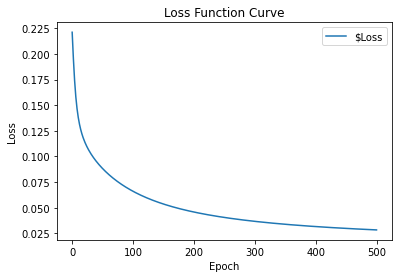

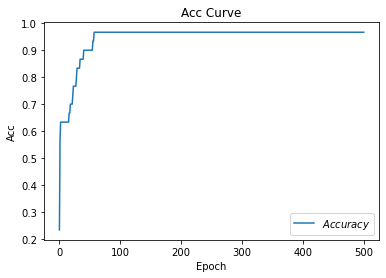

In [20]:
# 背下来！
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import tensorflow as tf

# 加载数据随机打乱
x_data = load_iris().data
y_data = load_iris().target
np.random.seed(120)
np.random.shuffle(x_data)
np.random.seed(120)
np.random.shuffle(y_data)

# 划分数据集
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 数据类型转换
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)

# batch
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 可训练参数
w = tf.Variable(tf.random.truncated_normal((4, 3), mean=0, stddev=0.1, seed=1))
b = tf.Variable(tf.random.truncated_normal((3,), mean=0, stddev=0.1, seed=1))

# 超参数
lr = 0.1
epochs = 500
train_loss_results = []
test_acc = []

# 对所有数据的epoch循环
for epoch in range(epochs+1):
    # 训练模型
    loss_all = 0
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train, w) + b
            y = tf.nn.softmax(y)    # 输出符合概率分布
            y_ = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y - y_))
            loss_all += loss.numpy()
        grads = tape.gradient(loss, [w, b])

        w.assign_sub(lr * grads[0])
        b.assign_sub(lr * grads[1])
        
    if epoch % 100 == 0:
        print("Epoch {}, loss {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)

    # 测试
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        y = tf.matmul(x_test, w) + b
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        total_correct += int(tf.reduce_sum(correct))
        total_number += x_test.shape[0]
    acc = total_correct / total_number
    test_acc.append(acc)
    if epoch % 100 == 0:
        print("Test_acc: ", acc)
        print("------------------------")

# 绘图
plt.title("Loss Function Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_loss_results, label="$Loss")
plt.legend()
plt.show()

# 绘制 Accuracy 曲线
plt.title("Acc Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.plot(test_acc, label="$Accuracy$")
plt.legend()
plt.show()